In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

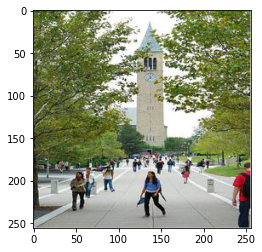

(256, 256)


In [7]:
from PIL import Image

image_0 = Image.open("images/resized/resized/4fd1006c8eb7c8105d5bb173_0.jpg")
image_1 = Image.open("images/new_images/4fd2a00e8eb7c8105d883bd5_1.jpg")

fig, ax = plt.subplots(1,2, figsize=(10,5))

plt.imshow(image_1)
ax[1].imshow(image_0)
plt.show()

In [41]:
import json

caption_data_path = "data/captioning_dataset.json"
# Load JSON data from a file
with open("data/captioning_dataset.json", 'r') as json_file:
    caption_data = json.load(json_file)

caption_data.get("4fd1006c8eb7c8105d5bb173")

{'images': {'1': '\nWatson, far right being congratulated by Ben Crane after winning the Masters on Sunday, could give golf a boost by drawing in fans with his adventurous style of play.\n\n',
  '0': '\nBubba Watson was able to save par, and seal his Masters victory, by hooking his second shot of the second playoff hole under trees and through the fairway.\n\n'},
 'headline': {'main': 'Unconventional Style, a Spectacular Shot, a Victory for Golf',
  'kicker': 'ON GOLF'},
 'abstract': "Karen Crouse On Golf column notes that Bubba Watson's adventurous style and his shot from the trees in a dramatic playoff produced a memorable Masters finish that could give golf a boost; says his triumph is a victory for creativity and feel and fun. Photo (M)",
 'article_url': 'https://www.nytimes.com/2012/04/10/sports/golf/2012-masters-bubba-watsons-title-is-a-victory-for-creativity-and-golf.html',
 'article': 'He walks to the beat of a different golfer. "I can do it," Watson said of hitting a ball stra

In [42]:
data = caption_data.get("54453eab38f0d832c813e7f5")
len(data["images"])

1

In [44]:
#select only 80000 keys

keys = list(caption_data.keys())
new_keys = keys[0:50000]
len(new_keys)

50000

In [45]:
from pathlib import Path
import json
import shutil

new_image_folder = Path("images/new_images")

try:
    # Attempt to create the new directory for images
    new_image_folder.mkdir()
    print(f"{new_image_folder} directory created...")
except FileExistsError:
    print(f"{new_image_folder} directory already exists...")

# Path to the new JSON file where the data will be appended
new_json_file = "data/new_caption_dataset.json"

new_data = {}
# Write file
for key in new_keys:
    img_text = caption_data[key].get("images")
    article = caption_data[key].get("article")

    if img_text is None or article is None or key in new_data:
        continue
    
    image_files_exist = all(Path(f"images/resized/resized/{key}_{i}.jpg").exists() for i in range(len(img_text)))
    
    if not image_files_exist:
        print(f"Skipping key '{key}' because corresponding image files do not exist.")
        continue
    
    # Copy images to the new images folder
    for i in range(len(img_text)):
        image_filename = f"{key}_{i}.jpg"
        source_image = f"images/resized/resized/{image_filename}"
        shutil.copy(source_image, new_image_folder)
    
    # Add data to new_data
    new_data[key] = {"image": img_text, "article": article}


try:
    with open(new_json_file, 'w') as f:
        json.dump(new_data, f, indent=4)
except Exception as e:
    print("Error writing JSON file:", e)


images\new_images directory already exists...
Skipping key '58cedcaa95d0e02489b91f23' because corresponding image files do not exist.
Skipping key '516ffdcccf28d02a6100155b' because corresponding image files do not exist.
Skipping key '53829a4a38f0d859e917eb2b' because corresponding image files do not exist.
Skipping key '5a686169d4211f00015bd398' because corresponding image files do not exist.
Skipping key '564a377238f0d83ab2f5a385' because corresponding image files do not exist.
Skipping key '5220b2f238f0d8740ac9b3aa' because corresponding image files do not exist.
Skipping key '55e6fc1938f0d86bbc6507f5' because corresponding image files do not exist.
Skipping key '576f139d38f0d8124116e67c' because corresponding image files do not exist.
Skipping key '592744b195d0e024b5872f41' because corresponding image files do not exist.
Skipping key '598437cd95d0e0246f1fe15f' because corresponding image files do not exist.
Skipping key '57e41bb695d0e021d7987c98' because corresponding image files 

In [46]:
k = list(new_data.keys())

In [47]:
len(k)

48273

In [ ]:
k[0:100]

['584f1ddf95d0e0392607597e',
 '54453eab38f0d832c813e7f5',
 '5a57160395d0e0110c1a3f23',
 '55b40f6b38f0d851b1f6dc7c',
 '51a92bb440e9ec65d203a9e4',
 '56562fe138f0d8310210dcbc',
 '58f7352c95d0e024b586c1c3',
 '5397a3d038f0d80b34dcbdd6',
 '549474a738f0d87118e48f39',
 '5812248995d0e022439c592f',
 '530a3ec438f0d831c50b528c',
 '561e353f38f0d86f05abed8c',
 '54381af238f0d83c143b8a23',
 '57b5bfff95d0e021d798158a',
 '54174bd638f0d851fd3a7bf1',
 '55e6a36238f0d86bbc6506da',
 '54fbdae138f0d80a0a50027a',
 '528aa36d38f0d833dcdee96b',
 '53050cbd38f0d843b6dd8a8e',
 '565bf65438f0d81f86d4e36d',
 '540b1abe38f0d84fb8834644',
 '53050cbd38f0d843b6dd8a8f',
 '53050cbd38f0d843b6dd8a8c',
 '53050cbd38f0d843b6dd8a8b',
 '59248f9895d0e024b5872783',
 '527001b738f0d83b1c13969c',
 '544306f338f0d8246e88ca37',
 '597903c595d0e0246f1fc8b2',
 '5325cf6938f0d8566fa991e4',
 '598e4efb95d0e0246f1ff5b8',
 '53d5226238f0d81a98fabcd5',
 '5294d96d38f0d807e9ba444e',
 '561d5b4f38f0d86f05abeb20',
 '5695a7e638f0d83e7cfe041b',
 '537b636b38f0

In [ ]:
new_data.get("5a81e88cd4211f00015c07e3")

{'image': {'0': 'Leon Botstein conducts the American Symphony Orchestra at Carnegie Hall in 2017. The orchestra will celebrate Rimsky-Korsakov at Bard Summerscape.'},
 'article': 'Outside of Russia, Rimsky-Korsakov\'s music has remained largely on the periphery of the repertory. But he will be front and center at this year\'s Bard SummerScape, which will take place at Bard College in Annandale-on-Hudson, N.Y., from June 28 to Aug. 19, and includes performances of music, theater and dance.\n\nThe SummerScape centerpiece, the Bard Music Festival, is known for its ambitious programming, taking deep dives into underserved composers (like Carlos Chavez) and resurrecting little-known works -- a favorite practice of its organizer, the conductor (and president of Bard) Leon Botstein. Twelve programs, over Aug. 10-12 and Aug. 17-19, will explore Rimsky-Korsakov\'s influences, contemporaries, and his effect on a future generation of Russian composers.\n\nHis one-act opera "Mozart and Salieri," w

In [48]:
with open("data/new_caption_dataset.json", 'r') as json_file:
    new_caption_data = json.load(json_file)

In [49]:
new_caption_keys = list(new_caption_data.keys())

In [50]:
print(len(new_caption_keys))

48273


In [ ]:
new_caption_data.get("565bf65438f0d81f86d4e36d")

{'image': {'0': 'Eric and Amber Hoffman in Osaka, Japan.'},
 'article': 'In 2012, Amber and Eric Hoffman downsized their life in Washington, D.C., by selling or donating most of their possessions. After quitting their day jobs -- in law and advertising -- they boarded a one-way flight to Ireland. And they have been on the road, more or less full time, ever since, Ms. Hoffman said.\n\nThe Hoffmans, who both grew up in New Jersey, now juggle promotional and consulting work for food and hospitality brands across Asia and Europe, and Ms. Hoffman is the founder of With Husband in Tow, a culinary travel blog. On Twitter, where she has about 22,000 followers, she calls herself a "recovering attorney and perpetual nomad."\n\nThe Hoffmans say they each own a mere 11 kilograms, or 24 pounds, of possessions, not including a few things they store at Mr. Hoffman\'s sister\'s house in North Carolina. Ms. Hoffman, 40, said the pared-down lifestyle is partly a reaction to the American habit of "spendi

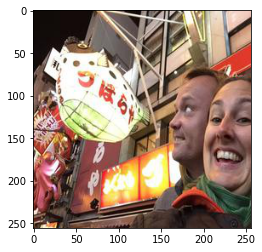

In [ ]:
img = Image.open("images/new_images/565bf65438f0d81f86d4e36d_0.jpg")
plt.imshow(img)